# Algorithms for Big Data - Exercise 1
This lecture is about basics of the tensorflow, we will discuss the minimal example on the MNIST dataset.
We also investigate a meaning of the validation sets and different complexity of the model.

[Open in Google colab](https://colab.research.google.com/github/rasvob/2020-21-ARD/blob/master/abd_01.ipynb)
[Download from Github](https://github.com/rasvob/2020-21-ARD/blob/master/abd_01.ipynb)

##### Remember to set GPU runtime in Colab!

### Import of the TensorFlow
The main version of the TensorFlow (TF) is a in the Version package in the field VERSION
Since the TensformFlow 2.0 everything was encapsulaed under the KERAS api.

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.version.VERSION)

2.8.0


### Import a dataset
Datasets are stored in the keras.datasets submodule. Few testing datasets are stored here and installed together with the TF package

In [5]:
# mnist is the basic dataset with handwritten digits
mnist = tf.keras.datasets.mnist

# data from any dataset are loaded using the load_Data function
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the data are in the form of 28x28 pixes with values 0-255.
print('Train data shape: ', x_train.shape)
print('Test data shape:  ', x_test.shape)

Train data shape:  (60000, 28, 28)
Test data shape:   (10000, 28, 28)


### Lets look on the data how do they look like.

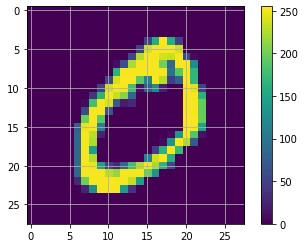

In [6]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(True)
plt.show()

### The conversion into range 0-1 is done by the division

In [7]:
# The conversion into range 0-1 is done by the division
x_train, x_test = x_train / 255.0, x_test / 255.0

### Make better visualization of the data to better understand how complex they are

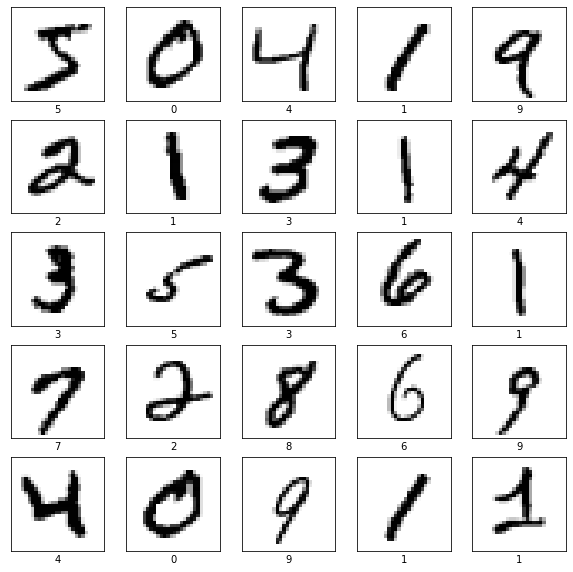

In [8]:
class_names = [str(x) for x in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Basic model - a NN with very simple hierarchy
Model is created using layers, many layers exists in the [layer submodule](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

Each layer uses a activation functions collected in the [module nn](https://www.tensorflow.org/api_docs/python/tf/nn)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(32, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.summary() # prints the summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Compilation of the model
Each model need to be compiled to be able to fit to the data and predict the labels

#### Optimizers
* Gradient descent
   * Works for the whole dataset and it is not suitable for large data
* Stochastic Gradiend Descent (SGD)
   * Approximate the real gradiend from selested subset of data (Stochasticity)
* Root Mean Square Propagation (RMSPRop)
   * Adapts the learnign rate with the running average of the recent gradients.
* Adamptive Moment Estimation (ADAM)
   * Averages gradients and secodn moment of the gradient and adapts the learning rate.

#### Loss functions
* Mean Squared Error
   * a classical measure to be used in regression
   * a logarithmic version exists
* Mean Absolute Error (MAE)
   * take an absolute values instead of their squared version
* Binary classification Loss
   * a loss for binary problems only
   * predicts the probability of the class 1
* Binary Cross-Entropy
   * predict the class from the set {0,1}
   * requires a sigmoind activation function
* Categorical Cross-Entropy
   * default for mutli-class classification problems
   * requires the softmax function on output layer to compute probability of each layer
   * train labels have to be one-hot-encoded
* Sparse Categorical Cross-Entropy
   * the same as above but the tran lables are just labels not encoded.

#### Metrics
* Regression metrics
   * Mean Squared Error (MSE)
   * Mean Absolute Error (MAE)
   * Mean Absolute Percentage Error (MAPE)
* Classification metrics
   * Binary Accuracy
   * Categorical Accuracy
   * Sparse Categorical Accuracy
   * Top k Categorical Accuracy
   * Sparse Top k Categorical Accuracy
   * Accuracy - a general version that is modified based on the data analyzed autmatically

In [10]:
model.compile(
    optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
)

### Model visualization
Model then compiles and it is ready for fitting to the data. 
The model may be printed into image like the following image of our model:

![model](https://github.com/jplatos/2019-2020-DA4/raw/master/images/da4_01_base.png "Base model of the neural network")

### Fit the model to the input data
The *fit()* method fit the model to the data, the parameters are *data* and *labels* from the train set and number of *epoch* to be trained.

In [11]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## The .fit() API is pretty powerful
- It is common to use some sort of a callback, we will use ModelCheckpoint callback which saves the best weights configuration obtained during training so the overfitting at the final phase of training will be suppressed
- The best weights are determined using the validation loss value

In [12]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights.best.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

In [13]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)

Epoch 1/3
375/375 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.8505 - val_loss: 0.2896 - val_accuracy: 0.9195
Epoch 2/3
375/375 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9234 - val_loss: 0.2406 - val_accuracy: 0.9333
Epoch 3/3
375/375 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9356 - val_loss: 0.2123 - val_accuracy: 0.9423


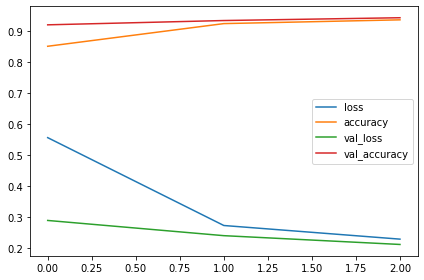

In [14]:
plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()

## The weights needs to be loaded after the training is finished

In [15]:
model.load_weights("weights.best.hdf5")

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2090 - accuracy: 0.9396
Test accuracy:  0.9395999908447266


## Tasks for the rest of the lecture

1. Investigate the quality of the model using validation sets.
2. Limit the overfitting using the regularization and dropout.
   1. L1 regularization (Lasso regression) - $\lambda_1 \sum_{i=0}^n \left\lvert w_i\right\rvert$
   2. L2 regularization (Ridge regression) - $\lambda_2 \sum_{i=0}^n \left\lVert w_i\right\rVert$
   3. Dropout
3. Prepare its own model that will classifiy the test data with precision more than 98 percent (or give it a try at least :)).


# Investigate the quality of the model using validation sets.

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.8653
Epoch 2/3
469/469 [==============================] - 1s 1ms/step - loss: 0.2427 - accuracy: 0.9319
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.1802 - accuracy: 0.9491
Test acc = 0.9491000175476074
Epoch 1/3
375/375 [==============================] - 1s 2ms/step - loss: 0.5725 - accuracy: 0.8425 - val_loss: 0.2767 - val_accuracy: 0.9240
Epoch 2/3
375/375 [==============================] - 1s 2ms/step - loss: 0.2607 - accuracy: 0.9258 - val_loss: 0.2153 - val_accuracy: 0.9423
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9466
Test acc = 0.9466000199317932
Epoch 1/3
329/329 [==============================] - 1s 2ms/step - loss: 0.5969 - accuracy: 0.8419 - val_loss: 0.3170 - val_accuracy: 0.9125
Epoch 2/3
329/329 [==============================] - 1s 2ms/step - loss: 0.2842 - accuracy: 0.9204 - val_loss: 0.2554 - v

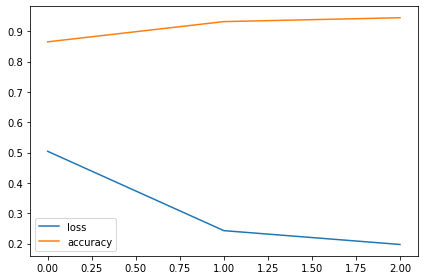

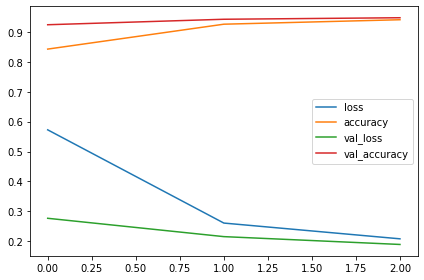

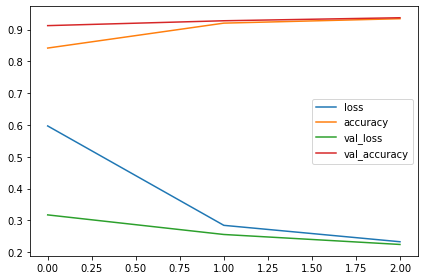

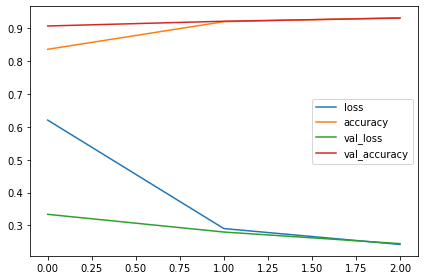

In [17]:
for val_size in [0.0, 0.2, 0.3, 0.4]:
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
      keras.layers.Dense(32, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
      keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
  ])

  model.compile(optimizer='adam',
      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics = ['accuracy'],
      )


  history = model.fit(x_train, y_train, validation_split=val_size, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)


  plt.figure()
  for key in history.history.keys():
      plt.plot(history.epoch, history.history[key], label=key)
  plt.legend()
  plt.tight_layout()


  test_loss, test_acc = model.evaluate(x_test, y_test)

  print(f"Test acc = {test_acc}")

# Limit the overfitting using the regularization and dropout.

   1. L1 regularization (Lasso regression) - $\lambda_1 \sum_{i=0}^n \left\lvert w_i\right\rvert$


Epoch 1/10
282/282 [==============================] - 1s 3ms/step - loss: 1.6940 - accuracy: 0.6185 - val_loss: 1.1897 - val_accuracy: 0.8732
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 1.0166 - accuracy: 0.8945 - val_loss: 0.8816 - val_accuracy: 0.9078
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.8091 - accuracy: 0.9187 - val_loss: 0.7573 - val_accuracy: 0.9193
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.7019 - accuracy: 0.9293 - val_loss: 0.6799 - val_accuracy: 0.9230
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6299 - accuracy: 0.9344 - val_loss: 0.6241 - val_accuracy: 0.9290
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5788 - accuracy: 0.9383 - val_loss: 0.5839 - val_accuracy: 0.9310
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.9420 - val_loss: 0.5551 - val_accuracy: 0.9332
Epoch 

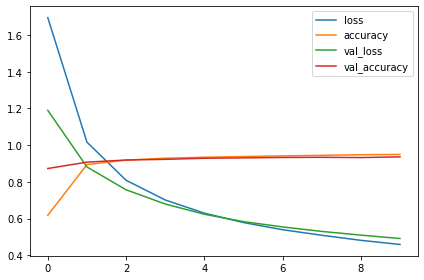

In [25]:
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
      keras.layers.Dense(32, activation=tf.nn.relu, activity_regularizer=tf.keras.regularizers.L1(0.1)), # standard dense-fully connected layer with the rectified lineaar function as an activation
      keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
  ])

  model.compile(optimizer='adam',
      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics = ['accuracy'],
      )


  history = model.fit(x_train, y_train, validation_split=val_size, epochs=10, callbacks=[model_checkpoint_callback], batch_size=128)


  plt.figure()
  for key in history.history.keys():
      plt.plot(history.epoch, history.history[key], label=key)
  plt.legend()
  plt.tight_layout()


  test_loss, test_acc = model.evaluate(x_test, y_test)

  print(f"Test acc = {test_acc}")


   2. L2 regularization (Ridge regression) - $\lambda_2 \sum_{i=0}^n \left\lVert w_i\right\rVert$

Epoch 1/10
282/282 [==============================] - 1s 3ms/step - loss: 1.5398 - accuracy: 0.7790 - val_loss: 1.1001 - val_accuracy: 0.8992
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.9169 - accuracy: 0.9143 - val_loss: 0.7986 - val_accuracy: 0.9190
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.7135 - accuracy: 0.9293 - val_loss: 0.6659 - val_accuracy: 0.9268
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6055 - accuracy: 0.9396 - val_loss: 0.5877 - val_accuracy: 0.9345
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.9450 - val_loss: 0.5313 - val_accuracy: 0.9394
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.9499 - val_loss: 0.4937 - val_accuracy: 0.9390
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.9540 - val_loss: 0.4625 - val_accuracy: 0.9425
Epoch 

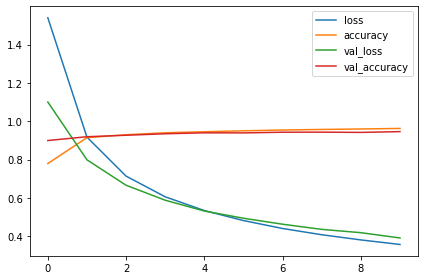

In [26]:
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
      keras.layers.Dense(32, activation=tf.nn.relu, activity_regularizer=tf.keras.regularizers.L2(0.1)), # standard dense-fully connected layer with the rectified lineaar function as an activation
      keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
  ])

  model.compile(optimizer='adam',
      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics = ['accuracy'],
      )


  history = model.fit(x_train, y_train, validation_split=val_size, epochs=10, callbacks=[model_checkpoint_callback], batch_size=128)


  plt.figure()
  for key in history.history.keys():
      plt.plot(history.epoch, history.history[key], label=key)
  plt.legend()
  plt.tight_layout()


  test_loss, test_acc = model.evaluate(x_test, y_test)

  print(f"Test acc = {test_acc}")


   3. Dropout
  

Epoch 1/10
282/282 [==============================] - 1s 3ms/step - loss: 1.1655 - accuracy: 0.7375 - val_loss: 0.6288 - val_accuracy: 0.8957
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.7045 - accuracy: 0.8503 - val_loss: 0.5132 - val_accuracy: 0.9107
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.6221 - accuracy: 0.8636 - val_loss: 0.4751 - val_accuracy: 0.9109
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.8708 - val_loss: 0.4454 - val_accuracy: 0.9168
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5582 - accuracy: 0.8777 - val_loss: 0.4277 - val_accuracy: 0.9185
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.8817 - val_loss: 0.4102 - val_accuracy: 0.9248
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.8837 - val_loss: 0.3901 - val_accuracy: 0.9230
Epoch 

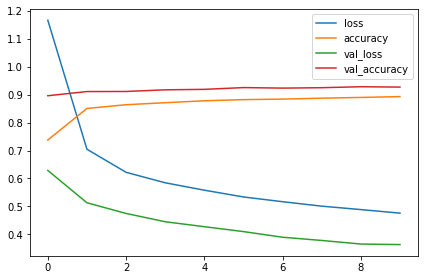

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.compile(
    optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
)


history = model.fit(x_train, y_train, validation_split=val_size, epochs=10, callbacks=[model_checkpoint_callback], batch_size=128)


plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()


test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test acc = {test_acc}")

# 3. Prepare its own model that will classifiy the test data with precision more than 98 percent (or give it a try at least :)).

Epoch 1/20
282/282 [==============================] - 7s 24ms/step - loss: 1.0195 - accuracy: 0.8089 - val_loss: 0.5620 - val_accuracy: 0.9266
Epoch 2/20
282/282 [==============================] - 7s 24ms/step - loss: 0.5651 - accuracy: 0.9093 - val_loss: 0.4692 - val_accuracy: 0.9295
Epoch 3/20
282/282 [==============================] - 7s 24ms/step - loss: 0.4777 - accuracy: 0.9217 - val_loss: 0.4012 - val_accuracy: 0.9430
Epoch 4/20
282/282 [==============================] - 7s 24ms/step - loss: 0.4249 - accuracy: 0.9286 - val_loss: 0.3776 - val_accuracy: 0.9384
Epoch 5/20
282/282 [==============================] - 7s 24ms/step - loss: 0.3884 - accuracy: 0.9352 - val_loss: 0.3551 - val_accuracy: 0.9443
Epoch 6/20
282/282 [==============================] - 7s 23ms/step - loss: 0.3640 - accuracy: 0.9385 - val_loss: 0.2993 - val_accuracy: 0.9570
Epoch 7/20
282/282 [==============================] - 7s 24ms/step - loss: 0.3431 - accuracy: 0.9426 - val_loss: 0.3062 - val_accuracy: 0.9556

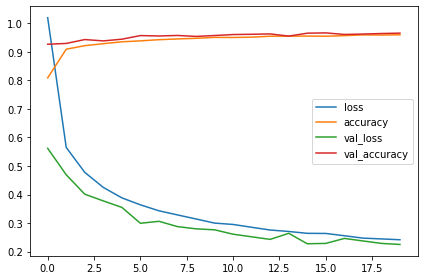

In [24]:
model = keras.Sequential([                      
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)), # standard dense
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.compile(
    optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
)


history = model.fit(x_train, y_train, validation_split=val_size, epochs=20, callbacks=[
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)], batch_size=128)


plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()


test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test acc = {test_acc}")

# L1 and L2 regularization
- Similiar technique in the regression algorithms
- Usually loss-based approach (regularization norm is added to the loss function)
- Enforce the training process to steer towards relatively “simple” weights, which may make your model more generic
    - E.g. L1 - sparsity, correlation reduction - weights can be exactly 0
    - L2 - weights will be relatively small numbers - no extremly huge number for one weight compared to the other ones - no exact 0 weights

## How does overfit look like? (Accuracy POV)
![overfit](https://github.com/rasvob/2020-21-ARD/raw/master/images/overfit_acc.png "Overfit")

## Are there any other cases for regularization usage besides weights?
## Is L1 or L2 reg. related to Dropout somehow?

## Keras API
- kernel_regularizer: weight reg.
- bias_regularizer: bias reg.
- activity_regularizer: layer's output reg.

- E.g. tf.keras.layers.Dense(500, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# Dropout
- Node sampling instead of edge sampling 
- If a node is dropped, then all incoming and outgoing connections from that node need to be dropped as well
- We sample sub-networks from the original one - basically ensemble of networks
- There won't be some "alpha" node in the individual layer with huge weight coefficient
    - Responsibility for prediction will be shared among multiple nodes

![dropout](https://github.com/rasvob/2020-21-ARD/raw/master/images/dropout.jpeg "Dropout")

## Keras API
- keras.layers.Dropout(0.5)